Copyright (C) 2021 H. Guo, N. Artrith (nartrith@atomistic.net), A. Urban (aurban@atomistic.net)

# Generate input files for VASP core-hole potential calculations

In [ ]:
import pymatgen as mg
from xas_tools.vasp import CHPCalculation

In [ ]:
struc = mg.Structure.from_file("./data/CONTCAR-Li7P3S11")
chp = CHPCalculation(struc, element="S")
chp.write_vasp_input(supercell=(1,2,1), band_multiple=2, path='Li7P3S11_chp_input')

# Process output from VASP CHP calculations

Postprocessing steps

- Extract the XAS data from the OUTCAR files (imaginary part of the dielectric function)
- Align the XAS spectra by applying the shift $(E_{\mathrm{tot}}^{\mathrm{ch}} - E_{\mathrm{tot}}^{\mathrm{no ch}})$

In [ ]:
from xas_tools.vasp import parse_vasp_chp_output

The following line extracts and postprocesses the XAS lines from all subdirectories with CHP calculations.  For each XAS line, a CSV file will be generated.  Additionally, a JSON file named `metadata.json` will be created that contains additional details of the calculation.

In [ ]:
parse_vasp_chp_output('./data/Li7P3S11')

# Visualization and analysis

In [1]:
from xas_tools.spectra import AbsorptionSpectrum

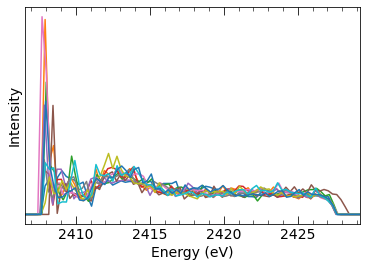

In [2]:
spectrum = AbsorptionSpectrum('XAS_output/structure_1')
spectrum.plot_atomic_lines();

In [3]:
# broadening of the calculated spectra
gauss = 0.3  # FWHM for Gaussian broadening
lorentz = [0.1, 0.5]  # linearly increasing FWHM for Lorentzian broadening
spectrum.calculated_broadened(gauss, lorentz[0], lorentz[1], 
                              energy_range=(None, 2420), dE=2.0)

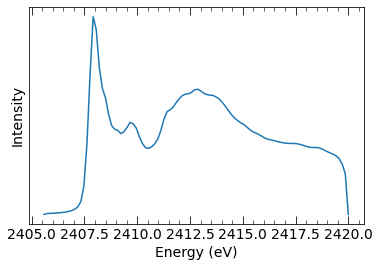

In [8]:
fig, ax = spectrum.plot_broadened()
import matplotlib.pyplot as plt
plt.savefig("Li7P3S11.pdf", bbox_inches='tight')